# Raw File Preprocessing and Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Raw file read

In [4]:
#Reading the raw csv file and creating pandas dataframe
file_path = "compas-scores-raw.csv"
df_com=  pd.read_csv(file_path, sep=',')
df_com.head(5)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


# Null Value Checking

In [7]:
# Null Value checking for each column as percentage
def null_value_check(df):
    x = 100*(df.isnull().sum())/len(df)
    print(x)
    
    
#Removing Column having null value    
def remove_null(df):
    df_filter = df.dropna(how='any',axis=0)
    print('Number of removed rows:')
    print(len(df)-len(df_filter))
    return df_filter


#Removing column based on null percentage checking
def missing_value_handle(df,percentage):
    missing_percentage = (df.isnull().mean() * 100)

    columns_to_remove = missing_percentage[missing_percentage > percentage].index

    df = df.drop(columns=columns_to_remove)

    num_removed_columns = len(columns_to_remove)
    print(f"Number of removed columns: {num_removed_columns}")
    return df

In [10]:
null_value_check(df_com)

Person_ID                   0.000000
AssessmentID                0.000000
Case_ID                     0.000000
Agency_Text                 0.000000
LastName                    0.000000
FirstName                   0.000000
MiddleName                 74.281347
Sex_Code_Text               0.000000
Ethnic_Code_Text            0.000000
DateOfBirth                 0.000000
ScaleSet_ID                 0.000000
ScaleSet                    0.000000
AssessmentReason            0.000000
Language                    0.000000
LegalStatus                 0.000000
CustodyStatus               0.000000
MaritalStatus               0.000000
Screening_Date              0.000000
RecSupervisionLevel         0.000000
RecSupervisionLevelText     0.000000
Scale_ID                    0.000000
DisplayText                 0.000000
RawScore                    0.000000
DecileScore                 0.000000
ScoreText                   0.073961
AssessmentType              0.000000
IsCompleted                 0.000000
I

In [11]:
#removing columns if columns contain greater than 50% missing value
df_com = missing_value_handle(df_com,50)
null_value_check(df_com)

Number of removed columns: 1
Person_ID                  0.000000
AssessmentID               0.000000
Case_ID                    0.000000
Agency_Text                0.000000
LastName                   0.000000
FirstName                  0.000000
Sex_Code_Text              0.000000
Ethnic_Code_Text           0.000000
DateOfBirth                0.000000
ScaleSet_ID                0.000000
ScaleSet                   0.000000
AssessmentReason           0.000000
Language                   0.000000
LegalStatus                0.000000
CustodyStatus              0.000000
MaritalStatus              0.000000
Screening_Date             0.000000
RecSupervisionLevel        0.000000
RecSupervisionLevelText    0.000000
Scale_ID                   0.000000
DisplayText                0.000000
RawScore                   0.000000
DecileScore                0.000000
ScoreText                  0.073961
AssessmentType             0.000000
IsCompleted                0.000000
IsDeleted                  0.000000

# Checking datatypes for each column

In [69]:
# checking datatypes for each column because it is important to convert some dataypes to another for further analysis
df_com.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [1]:
# Removing dateOfBirth
#df_com.drop('DateOfBirth', axis=1, inplace=True)
#df_com

In [ ]:
df_com.Screening_Date = pd.to_datetime(df_com['Screening_Date'])

# Converting Object datatype to Numerical 

In [16]:
df_com.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
Sex_Code_Text               object
Ethnic_Code_Text            object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
Age                          int64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

#converting object datatypes to numerical using built in labelEncoder function
columns_to_encode = ['Sex_Code_Text','LegalStatus','CustodyStatus','MaritalStatus','AssessmentType']

label_encodings = {}

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    df_com[column] = label_encoder.fit_transform(df_com[column])
    label_encodings[column] = {label: encoded for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}




In [35]:
#Result of label encoding
label_encodings

{'Sex_Code_Text': {'Female': 0, 'Male': 1},
 'LegalStatus': {'Conditional Release': 0,
  'Deferred Sentencing': 1,
  'Other': 2,
  'Parole Violator': 3,
  'Post Sentence': 4,
  'Pretrial': 5,
  'Probation Violator': 6}}

### DateofBirth to Age column

In [12]:
import pandas as pd
from datetime import datetime


def process_date_of_birth(date_str):
    day, month, year = map(int, date_str.split('/'))
    complete_date_str = f'{month}/{day}/{year}'

    birthdate = datetime.strptime(complete_date_str, '%d/%m/%Y')  # Adjust the date format here
    current_date = datetime.now()
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))

    return complete_date_str, age




In [13]:
# Adding new column as Age from Date of Birth column
df_com[['DateOfBirth', 'Age']] = df_com['DateOfBirth'].apply(process_date_of_birth).apply(pd.Series)

df_com

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,Age
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,5/12/1992,22,...,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,30
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,5/12/1992,22,...,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,30
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,5/12/1992,22,...,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,30
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,16/9/1984,22,...,Low,7,Risk of Violence,-2.84,2,Low,New,1,0,39
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,16/9/1984,22,...,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,Male,African-American,21/6/1964,22,...,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0,59
60839,65667,79665,72038,Probation,West,James,Male,African-American,21/6/1964,22,...,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0,59
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,6/2/1985,22,...,Low,7,Risk of Violence,-2.75,2,Low,New,1,0,38
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,6/2/1985,22,...,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0,38


# Columns to remove 

In [17]:
#checking the columns
df_com.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'Sex_Code_Text', 'Ethnic_Code_Text', 'ScaleSet_ID',
       'ScaleSet', 'AssessmentReason', 'Language', 'LegalStatus',
       'CustodyStatus', 'MaritalStatus', 'Screening_Date',
       'RecSupervisionLevel', 'RecSupervisionLevelText', 'Scale_ID',
       'DisplayText', 'RawScore', 'DecileScore', 'ScoreText', 'AssessmentType',
       'IsCompleted', 'IsDeleted', 'Age'],
      dtype='object')

In [19]:
#removing unnecessary columns from the dataframe
columns_drop = ['AssessmentID','Case_ID','ScaleSet_ID','IsCompleted','IsDeleted']
df_com = df_com.drop(columns_drop, axis=1)
df_com.head()

,Person_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,Age
0,50844,PRETRIAL,Fisher,Kevin,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,30
1,50844,PRETRIAL,Fisher,Kevin,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,30
2,50844,PRETRIAL,Fisher,Kevin,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,30
3,50848,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,39
4,50848,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,Risk and Prescreen,Intake,English,Pretrial,...,1/1/2013 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,39


# Cleaning Data

In [21]:
#Representing same thing with different values
df_com['Ethnic_Code_Text'].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'African-Am', 'Native American', 'Oriental', 'Arabic'],
      dtype=object)

In [22]:
df_com[df_com.Ethnic_Code_Text == 'African-Am'].head()

,Person_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,AssessmentReason,Language,LegalStatus,...,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,Age
1497,4074,PRETRIAL,pratt,michael,Male,African-Am,Risk and Prescreen,Intake,English,Post Sentence,...,1/16/2013 0:00,4,High,7,Risk of Violence,-0.67,9,High,New,40
1498,4074,PRETRIAL,pratt,michael,Male,African-Am,Risk and Prescreen,Intake,English,Post Sentence,...,1/16/2013 0:00,4,High,8,Risk of Recidivism,0.83,10,High,New,40
1499,4074,PRETRIAL,pratt,michael,Male,African-Am,Risk and Prescreen,Intake,English,Post Sentence,...,1/16/2013 0:00,4,High,18,Risk of Failure to Appear,24.00,6,Medium,New,40
1668,51294,Probation,Jean Baptiste,Examon,Male,African-Am,Risk and Prescreen,Intake,English,Post Sentence,...,1/17/2013 0:00,1,Low,7,Risk of Violence,-4.12,1,Low,New,67
1669,51294,Probation,Jean Baptiste,Examon,Male,African-Am,Risk and Prescreen,Intake,English,Post Sentence,...,1/17/2013 0:00,1,Low,8,Risk of Recidivism,-1.58,1,Low,New,67


In [23]:
#Replacing 'African-Am' to 'African-American' to get the one unique value for African-American people
df_com.Ethnic_Code_Text = df_com.Ethnic_Code_Text.replace({
    'African-Am':'African-American'
})

In [24]:
df_com['Ethnic_Code_Text'].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'Native American', 'Oriental', 'Arabic'], dtype=object)

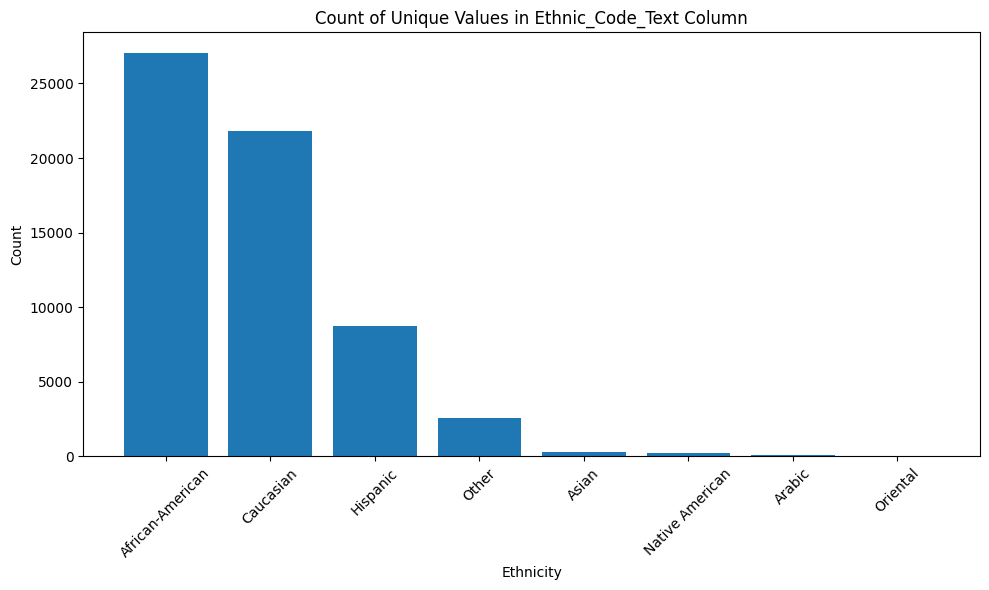

In [25]:

#barplot to observe the frequency count over Ethnicity
import matplotlib.pyplot as plt

value_counts = df_com['Ethnic_Code_Text'].value_counts()


unique_values = value_counts.index
counts = value_counts.values

plt.figure(figsize=(10, 6))
plt.bar(unique_values, counts)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Count of Unique Values in Ethnic_Code_Text Column')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [26]:
#converting non majority groups to ohter because of having low frequency in the dataset
df_com.Ethnic_Code_Text = df_com.Ethnic_Code_Text.replace({
    'Asian':'Other',
    'Oriental':'Other',
    'Arabic':'Other',
    'Native American':'Other'
})

In [27]:
df_com['Ethnic_Code_Text'].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other'], dtype=object)

# Checking the age ranges for dataset

In [11]:
def densityplot(df,column):
    data = df[column]
    sns.kdeplot(data, shade=True)
    mean = data.mean()
    median = data.median()
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='blue', linestyle='--', label='Median')
    plt.title('Density Plot of Values with Mean and Median')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

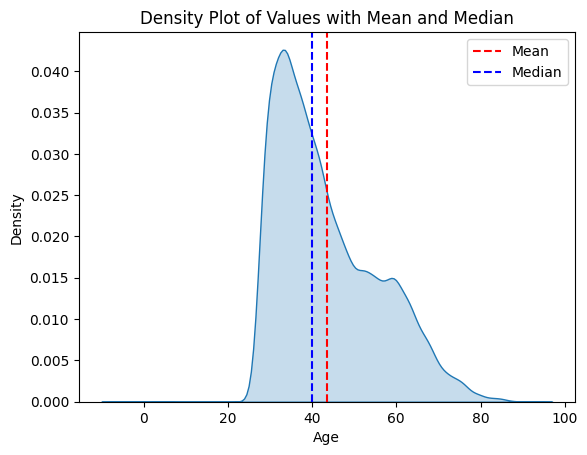

In [29]:
#checking age distribution over dataset 
densityplot(df_com,'Age')

In [37]:
df_com = remove_null(df_com)

Number of removed rows:
45


# Normalize data using minmax or z-score

In [39]:
#Scaling the dataset
def normalization(df,norm_type):
    
    if norm_type == 'z-score':
        df_normalized = (df - df.mean()) / df.std()
    elif norm_type == 'minmax':
        df_normalized = (df - df.min()) / (df.max() - df.min())

    return df_normalized

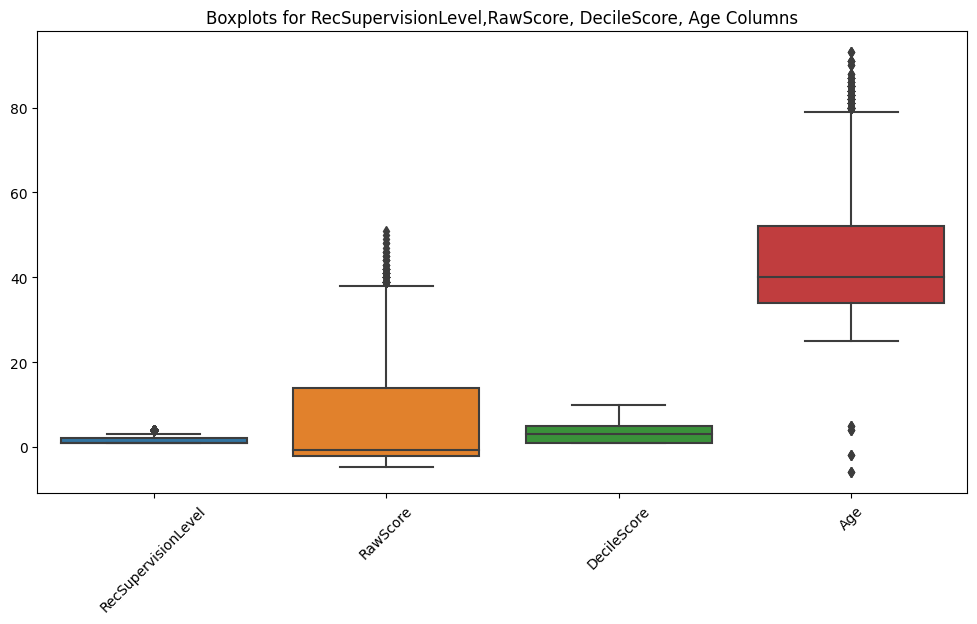

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['RecSupervisionLevel','RawScore', 'DecileScore', 'Age']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_com[columns_to_plot])
plt.xticks(rotation=45)
plt.title('Boxplots for RecSupervisionLevel,RawScore, DecileScore, Age Columns')
plt.show()

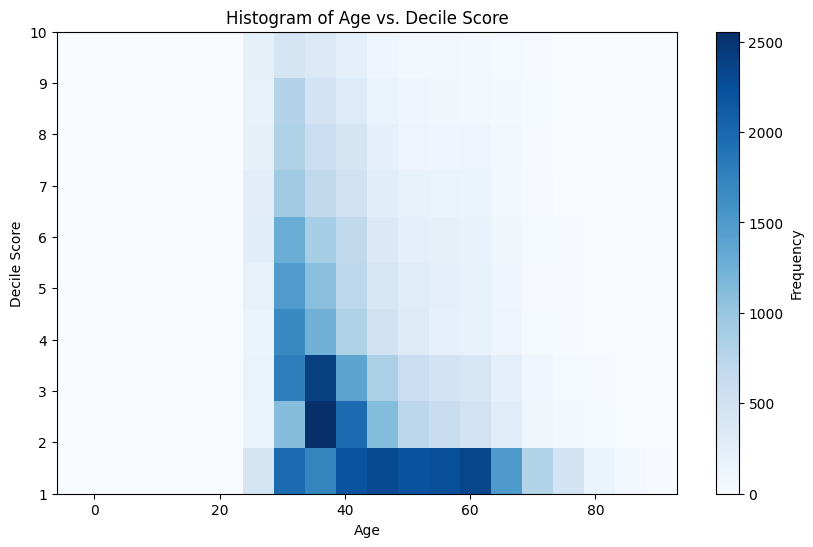

In [3]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.hist2d(df_com['Age'], df_com['DecileScore'], bins=[20, 10], cmap='Blues')

plt.xlabel('Age')
plt.ylabel('Decile Score')
plt.title('Histogram of Age vs. Decile Score')
cbar = plt.colorbar()
cbar.set_label('Frequency')

plt.show()


In [38]:
df_com.to_csv("compas-scores-preprocessed_dataset.csv",index=False)